# Лабораторна робота #5
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__


## Базова ініціалізація

In [418]:
import random as rnd

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mplt

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.datasets import fashion_mnist

from sklearn import metrics, datasets, model_selection
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [419]:
model = pd.read_csv('./Pokemon.csv')

model.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405.0,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525.0,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309.0,39,52,43,60,50,65,1,False


In [420]:
model.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [421]:
insurance=pd.get_dummies(model)
insurance.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,318.0,45,49,49,65,65,45,1,False,...,0,0,0,0,0,1,0,0,0,0
1,2,405.0,60,62,63,80,80,60,1,False,...,0,0,0,0,0,1,0,0,0,0
2,3,525.0,80,82,83,100,100,80,1,False,...,0,0,0,0,0,1,0,0,0,0
3,3,625.0,80,100,123,122,120,80,1,False,...,0,0,0,0,0,1,0,0,0,0
4,4,309.0,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0


In [422]:
X = insurance.drop('Total', axis=1)
y = insurance['Total']

print(X.head())
print(y.head())

   #  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
0  1  45      49       49       65       65     45           1      False   
1  2  60      62       63       80       80     60           1      False   
2  3  80      82       83      100      100     80           1      False   
3  3  80     100      123      122      120     80           1      False   
4  4  39      52       43       60       50     65           1      False   

   Name_Abomasnow  ...  Type 2_Ghost  Type 2_Grass  Type 2_Ground  Type 2_Ice  \
0               0  ...             0             0              0           0   
1               0  ...             0             0              0           0   
2               0  ...             0             0              0           0   
3               0  ...             0             0              0           0   
4               0  ...             0             0              0           0   

   Type 2_Normal  Type 2_Poison  Type 2_Psychic  T

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

tf.random.set_seed(100)

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=Adam(), metrics=['mse'])

X_train

array([[720.,  80., 110., ...,   0.,   0.,   0.],
       [375.,  60.,  75., ...,   0.,   0.,   0.],
       [  1.,  45.,  49., ...,   0.,   0.,   0.],
       ...,
       [ 66.,  70.,  80., ...,   0.,   0.,   0.],
       [217.,  90., 130., ...,   0.,   0.,   0.],
       [ 32.,  46.,  57., ...,   0.,   0.,   0.]], dtype=float32)

In [424]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 735us/step - loss: 166672.8438 - mse: 166672.8438
Epoch 2/10
20/20 [==============================] - 0s 683us/step - loss: 119868.6719 - mse: 119868.6719
Epoch 3/10
20/20 [==============================] - 0s 621us/step - loss: 80753.5469 - mse: 80753.5469
Epoch 4/10
20/20 [==============================] - 0s 577us/step - loss: 50661.3828 - mse: 50661.3828
Epoch 5/10
20/20 [==============================] - 0s 735us/step - loss: 30421.3027 - mse: 30421.3027
Epoch 6/10
20/20 [==============================] - 0s 735us/step - loss: 19408.9922 - mse: 19408.9922
Epoch 7/10
20/20 [==============================] - 0s 727us/step - loss: 14783.0752 - mse: 14783.0752
Epoch 8/10
20/20 [==============================] - 0s 682us/step - loss: 12748.1279 - mse: 12748.1279
Epoch 9/10
20/20 [==============================] - 0s 682us/step - loss: 11547.4863 - mse: 11547.4863
Epoch 10/10
20/20 [==============================] - 0s 630us/step - 

In [425]:
history_2 = model.fit(X_train, y_train, epochs=200)

score_1 = model.evaluate(X_test, y_test)

Epoch 1/200
20/20 [==============================] - 0s 776us/step - loss: 9574.2305 - mse: 9574.2305
Epoch 2/200
20/20 [==============================] - 0s 682us/step - loss: 8611.1221 - mse: 8611.1221
Epoch 3/200
20/20 [==============================] - 0s 736us/step - loss: 7694.9907 - mse: 7694.9907
Epoch 4/200
20/20 [==============================] - 0s 916us/step - loss: 6817.0547 - mse: 6817.0547
Epoch 5/200
20/20 [==============================] - 0s 735us/step - loss: 5991.6909 - mse: 5991.6909
Epoch 6/200
20/20 [==============================] - 0s 630us/step - loss: 5210.2485 - mse: 5210.2485
Epoch 7/200
20/20 [==============================] - 0s 682us/step - loss: 4508.0264 - mse: 4508.0264
Epoch 8/200
20/20 [==============================] - 0s 653us/step - loss: 3849.3813 - mse: 3849.3813
Epoch 9/200
20/20 [==============================] - 0s 636us/step - loss: 3242.7490 - mse: 3242.7490
Epoch 10/200
20/20 [==============================] - 0s 525us/step - loss: 2717.5

In [426]:
path = 'model.h5'

model.save(path)

loaded_model= tf.keras.models.load_model(path)

y1 = model.predict(X_test)
y2 = loaded_model.predict(X_test)

print(f'y_1: {y1.sum()}')
print(f'y_2: {y2.sum()}')
print(f'y_1 - y_2: {(y1 - y2).sum()}')

y_1: 69277.15625
y_2: 69277.15625
y_1 - y_2: 0.0


In [427]:
transformer = make_column_transformer(
    (MinMaxScaler(), ['HP', 'Attack', 'Defense']), 
    (OneHotEncoder(handle_unknown='ignore'),
    ['Sp. Atk', 'Sp. Def']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

transformer.fit(X_train)

X_train_norm = transformer.transform(X_train).astype(np.float32).toarray()
print(type(X_train_norm))
X_test_norm = transformer.transform(X_test).astype(np.float32).toarray()
print(type(X_test_norm))

model_2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [428]:
model_2.compile(loss='mse', optimizer=Adam(), metrics=['mse', 'mae'])

history_model_2 = model_2.fit(X_train_norm, y_train, epochs=30, verbose=0)

model_2.evaluate(X_test_norm, y_test)

X_train.shape

5/5 [==============================] - 0s 997us/step - loss: 2802.5593 - mse: 2802.5593 - mae: 39.2226


(640, 845)

dict_keys(['loss', 'mse', 'mae'])


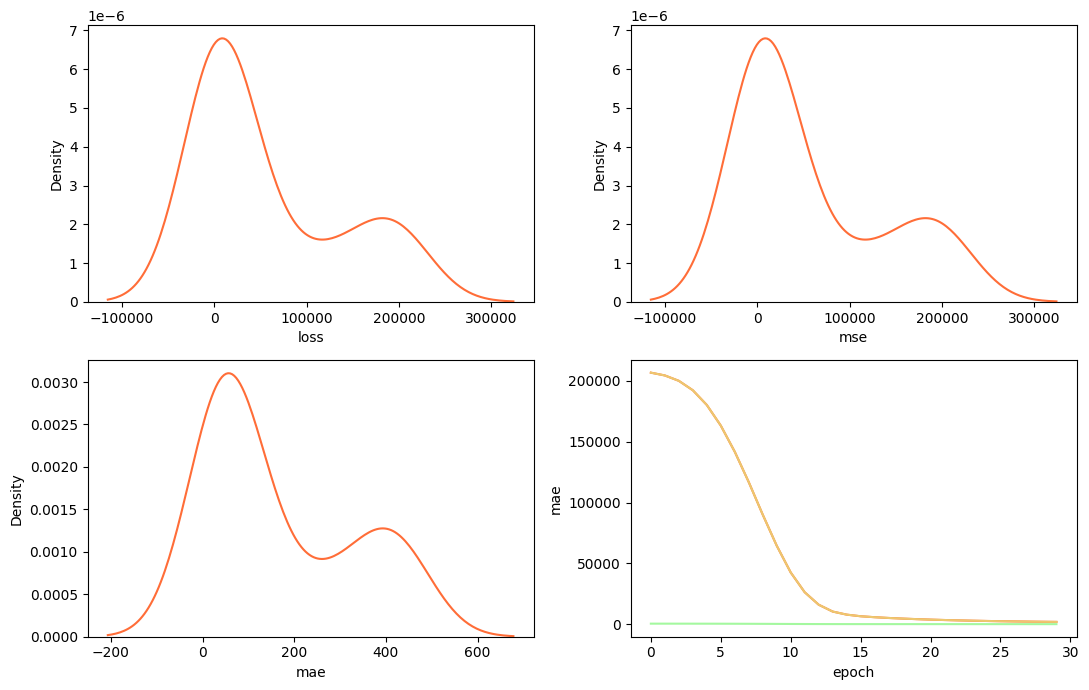

In [429]:
fig, axes = plt.subplots(2, 2, figsize=(11,7), dpi=100)
sns.set_palette('rainbow_r')

HUE = 'Legendary'
# HUE = 'Generation'

print(history_model_2.history.keys())


sns.kdeplot(ax=axes[0,0], data=history_model_2.history, x='loss')
plt.plot(history_model_2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

sns.kdeplot(ax=axes[0,1], data=history_model_2.history, x='mse')
plt.plot(history_model_2.history['mse'])
plt.ylabel('mse')
plt.xlabel('epoch')

sns.kdeplot(ax=axes[1,0], data=history_model_2.history, x='mae')
plt.plot(history_model_2.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')

plt.tight_layout()

In [430]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [431]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [432]:
train_data[0].shape, train_labels[0].shape


((28, 28), ())

In [433]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [434]:
model.layers

In [435]:
weights, biases = model.layers[1].get_weights()

weights, weights.shape

(array([[ 0.624109  ],
        [-0.67131996],
        [ 0.57094467],
        [ 0.4490617 ],
        [-0.27502862],
        [-0.81545496],
        [-0.42592067],
        [ 0.5458443 ],
        [ 0.5486368 ],
        [ 0.7475854 ]], dtype=float32),
 (10, 1))

In [436]:
biases, biases.shape

(array([0.11810663], dtype=float32), (1,))

In [437]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (32, 10)                  8460      
_________________________________________________________________
dense_155 (Dense)            (32, 1)                   11        
Total params: 8,471
Trainable params: 8,471
Non-trainable params: 0
_________________________________________________________________
